# Modeling the Temperature Control Laboratory: Part 3

## Dynamics of the Heater/Sensor System

The previous results are not yet fully satisfactory. We're still missing the initial 'lag' in response of the measured temperature. 

For this third model, we consider the possibility that the heater and sensor may not be at the same temperature. In other words, that the heater/sensor assembly is not at a uniform temperature. To account for this possibility, we introduce $T_{H,1}$ to denote the temperature of heater one and $T_{S,1}$ to denote the temperature of the corresponding sensor. We'll further assume that sensor mainly exchanges heat with the heater, and the dominant heat transfer to the surroundings is through the heat sink attached to the heater.

This motivates a model

\begin{align}
C^H_p\frac{dT_{H,1}}{dt} & = U_a(T_{amb} - T_{H,1}) + U_c(T_{S,1} - T_{H,1}) + P_1u_1\\
C^S_p\frac{dT_{S,1}}{dt} & = U_c(T_{H,1} - T_{S,1}) 
\end{align}

where $C^H_p$ and $C^S_p$ are the gross heat capacities of the heater and sensor, respectively, and $U_c$ is a new heat transfer coefficient characterizing the exchange of heat between the heater and sensor.

## Model in deviation variables

Following the approach demonstrated in the first two models, we construct a model in terms of deviation from ambient temperature.

\begin{align}
\frac{dT_{H,1}'}{dt} & = -\frac{U_a+U_c}{C^H_p}T_{H,1}' + \frac{U_c}{C^H_p}T_{S,1}' + P_1u_1\\
\frac{dT_{S,1}'}{dt} & = \frac{U_c}{C^S_p}(T_{H,1}' - T_{S,1}') 
\end{align}

Next we jump right to the step of tuning the model parameters to fit the step response data.

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interact

data = pd.read_csv('Step_Test_Data.csv').set_index('Time')[1:]
t = data.index
T1 = data['T1'].values
T2 = data['T2'].values

# known parameter values
P1 = 4
u1 = 0.5   # steady state value of u1 (fraction of total power)
P2 = 2
u2 = 0.0
T_ambient = 21

def compare(Ua, Uc, Cp_H, Cp_S):
    def deriv(T,t):
        T_H1, T_S1 = T
        dT_H1 = -(Ua + Uc)*T_H1/Cp_H + Uc*T_S1/Cp_H + P1*u1/Cp_H
        dT_S1 = Uc*T_H1/Cp_S - Uc*T_S1/Cp_S
        return [dT_H1, dT_S1]
    T = odeint(deriv, [0,0], t)
    # plot
    plt.figure(figsize=(10,6))
    plt.subplot(2,1,1)
    plt.plot(t, T[:,1] + T_ambient, t, T1)
    plt.xlabel('Time / seconds')
    plt.ylabel('Temperature / °C')
    plt.title('Fitting model to Step Test Data for Heater 1')
    plt.grid()
    plt.text(300, 40, 'Ua = ' + str(Ua))
    plt.text(300, 35, 'Uc = ' + str(Uc))
    plt.text(300, 30, 'Cp_H = ' + str(Cp_H))
    plt.text(300, 25, 'Cp_S = ' + str(Cp_S))
    plt.subplot(2,1,2)
    plt.plot(t, T[:,1] + T_ambient - T1)
    plt.title('Model Error')
    plt.xlabel('Time / seconds')
    plt.ylabel('Temperature / °C')
    plt.grid()
    plt.tight_layout()

interact(compare, 
         Ua=(0,0.08,0.001), 
         Uc=(0,0.06,0.001), 
         Cp_H=(3,11,0.1), 
         Cp_S = (0.1,2,.01))

A Jupyter Widget

<function __main__.compare>

## Consequences of this Model

An important consequence of this model is that temperature reported by sensor is not keep up with the heater temperature during rapid transients. To see this, below we plot the measured temperature and the predicted heater temperature.

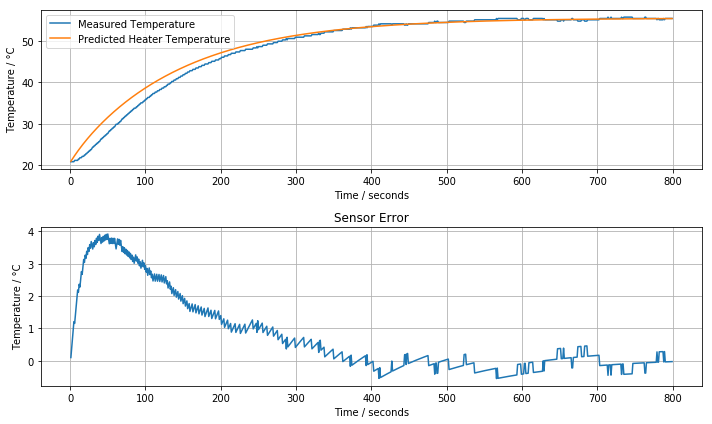

In [26]:
# fitted parameters
Ua = 0.058
Uc = 0.051
Cp_H = 7.0
Cp_S = 1.12

# known parameter values
P1 = 4
u1 = 0.5   # steady state value of u1 (fraction of total power)
P2 = 2
u2 = 0.0
T_ambient = 21

def deriv(T,t):
    T_H1, T_S1 = T
    dT_H1 = -(Ua + Uc)*T_H1/Cp_H + Uc*T_S1/Cp_H + P1*u1/Cp_H
    dT_S1 = Uc*T_H1/Cp_S - Uc*T_S1/Cp_S
    return [dT_H1, dT_S1]
T = odeint(deriv, [0,0], t)

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(t, T1, t, T[:,0]+T_ambient)
plt.xlabel('Time / seconds')
plt.ylabel('Temperature / °C')
plt.legend(['Measured Temperature','Predicted Heater Temperature'])
plt.grid()

plt.subplot(2,1,2)
plt.plot(t, T[:,0] + T_ambient - T1)
plt.title('Sensor Error')
plt.xlabel('Time / seconds')
plt.ylabel('Temperature / °C')
plt.grid()
plt.tight_layout()


In some applications, such as crystallization, fermentation and separations, a mismatch of 4°C can be very significant. 